In [ ]:
%matplotlib inline
import numpy as np
import xarray as xr
#from cartopy import crs, feature
from datetime import datetime, timedelta
import cmocean
from matplotlib import pyplot as plt, animation, rc,colors
from IPython.display import Image
rc('animation', html='html5')
import os
import sys
import re

In [ ]:
path_run = '/results2/SalishSea/nowcast-green.202111' 
path_run_tall = '/ocean/atall/MOAD/Model/202410b/oxygen' 

In [ ]:
M_path = '/home/jvalenti/MOAD/'
coords = xr.open_dataset(M_path+'grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset(M_path+'grid2/mesh_mask202108_TDV.nc')
lon = coords.nav_lon
x= np.linspace(0,lon.shape[1],lon.shape[1])
y = np.linspace(0,lon.shape[0],lon.shape[0])
X,Y = np.meshgrid(x,y)

In [ ]:
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [ ]:
def make_filename(path_run,start,day, var='prod_T', res='h'):
    """Construct path prefix for local SHEM results given date object and paths dict
    """
    date  =  (start + timedelta(days=day))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path_run, f'{folder}/')
    fname = []
    for file in os.listdir(prefix):
        if (var in file) and ('_1'+res) in file:
            fname.append(file)
    if len(fname)>1:
        print('more than one file found') 
    
    return os.path.join(prefix, fname[0])


In [ ]:
day = 0
start = datetime(2021,8,25)
make_filename(path_run_tall,start,day, var='chem_T', res='d')

'/ocean/atall/MOAD/Model/202410b/oxygen/25aug21/SalishSea_1d_20210825_20210825_chem_T.nc'

In [ ]:
#prod = xr.open_dataset(make_filename(path_run,start,day, var='prod_T', res='d')).HetHBAC
#Nat_mort = xr.open_dataset(make_filename(path_run,start,day, var='graz_T', res='d')).MORTHBAC
#Mic_graz = xr.open_dataset(make_filename(path_run,start,day, var='graz_T', res='d')).GRMICZHBAC
PP0 = xr.open_dataset(make_filename(path_run,start,0, var='prod_T', res='d')).PPDIAT
PP = xr.open_dataset(make_filename(path_run,start,day, var='prod_T', res='d')).PPDIAT


Ox0 = xr.open_dataset(make_filename(path_run,start,0, var='chem_T')).dissolved_oxygen
Ox = xr.open_dataset(make_filename(path_run,start,day, var='chem_T', res='d')).dissolved_oxygen
DIC = xr.open_dataset(make_filename(path_run,start,day, var='chem_T')).dissolved_inorganic_carbon
Z2 = xr.open_dataset(make_filename(path_run,start,day, var='chem_T', res='d')).dissolved_oxygen



NH4 = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).ammonium
NH40 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).ammonium
diat0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).diatoms
diat = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).diatoms

NO3 = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).nitrate
flag0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).flagellates
flag = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).flagellates

#hbac = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).heterotrophic_bacteria
DOM = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).dissolved_organic_nitrogen
DOM0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).dissolved_organic_nitrogen
POM = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).particulate_organic_nitrogen
POM0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).particulate_organic_nitrogen

In [ ]:
Orray = np.array(Ox[0,:,:,:])
def findanox(Orray):
    oflat =Orray.flatten()
    positions = np.where((oflat<65) & (oflat>0))
    coords = np.unravel_index(positions[0], Orray.shape)

    xy = []
    for ind in range(coords[0].shape[0]):
        xy.append((coords[1][ind],coords[2][ind]))
    set_coord = set(xy)
    xx = []
    yy = []
    for tup in set_coord:
        yy.append(tup[0])
        xx.append(tup[1])
    return xx,yy

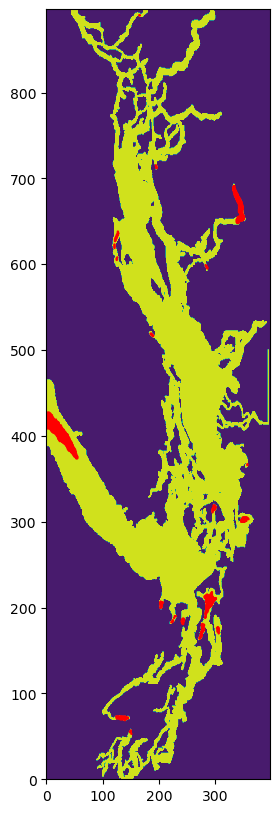

In [ ]:
plt.figure(figsize=(10,10))
plt.contourf(mask.tmask[0,0,:,:])
xx,yy = findanox(Orray)
plt.scatter(xx,yy,s=np.ones(len(yy))*0.5,color='red')
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

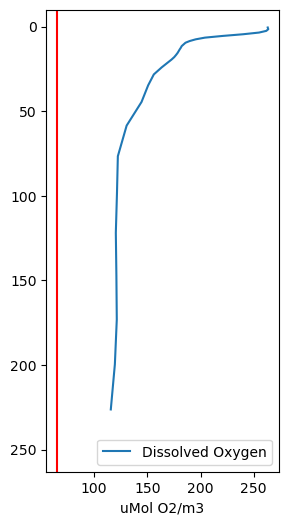

In [ ]:
jj,ii = finder(48.58042615605835, -123.50289311333903)
zz = np.argmin(np.array(mask.tmask[-1,:,jj,ii]))
fig,axs=plt.subplots(1,figsize=(3,6))
plt.plot(Ox[-1,:zz,jj,ii],Ox.deptht[:zz],label='Dissolved Oxygen')
plt.axvline(x = 65,color = 'red')

plt.ylim([Ox.deptht[zz]+10,-10])
plt.xlabel('uMol O2/m3')
plt.legend()

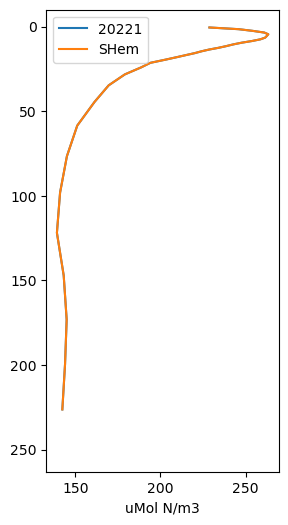

In [ ]:
#jj,ii = finder(49.286779538295114, -123.74497535526103)
fig,axs=plt.subplots(1,figsize=(3,6))
ii = 266
jj = 423 #plt.plot(hbac[-1,:zz,jj,ii],hbac.deptht[:zz],label='Het.bacteria')
plt.plot(Ox[-1,:zz,jj,ii],diat.deptht[:zz],label='20221')
plt.plot(Z2[-1,:zz,jj,ii],diat.deptht[:zz],label='SHem')

plt.ylim([diat.deptht[zz]+10,-10])
plt.xlabel('uMol N/m3')
plt.legend()

In [ ]:
DOM_notz = np.array(DOM[0,:,:,:]).flatten()
DOM_notz=DOM_notz[DOM_notz!=0]
np.nanmean(DOM_notz)

np.float32(0.77662706)

In [ ]:
def steadystate(file='biol_T',var = 'heterotrophic_bacteria',res=1):
    startT = datetime(2021, 1, 1)
    lenT = 3600 #hours from start to run
    
    filelib = {}
    hbac =[]

    for days in range(0,1+(lenT-1)//24,res):
        timeT = startT + timedelta(days=days)
        ti = timeT.strftime('%Y%m%d')  
        filelib[days,var]= xr.open_dataset(make_filename(path_run,startT,days, file, res='h'))[var]
        hbac.append(np.nansum(np.array(filelib[days,var][0,:,:,:]).flatten()))
    plt.plot(hbac)

In [ ]:
# plotslib = {'chem_T':{'var':['dissolved_oxygen'],'res':'d'},
#         'biol_T':{'var':['diatoms','particulate_organic_nitrogen','dissolved_organic_nitrogen','ammonium','nitrate','flagellates','microzooplankton','mesozooplankton'],'res':'d'}
#         }
# variables = ['O2','Diat','PON','DON','NH4','NO3','Flag','Z1','Z2','PPDiat','PPPhy']
# startT = datetime(2021, 1, 1)
# lenT = 4344 #hours from start to run
# #lenT = 300
# res = 10
# depths = [0,50,200]
# shal_int = np.where(mask.gdept_1d[0]>50)[0][0]
# int_deep = np.where(mask.gdept_1d[0]>200)[0][0]
# depths_k = [0,shal_int,int_deep]

# filelib = {}
# count = np.zeros([len(variables),int((lenT//24)/res)+1,len(depths)])
# for i,days in enumerate(range(0,1+(lenT-1)//24,res)):
#     ccc = 0
#     for c,files in enumerate(plotslib):
#         filelib[days,files]= xr.open_dataset(make_filename(path_run_tall,startT,days, files, res=plotslib[files]['res']))
#         for j,var in enumerate(plotslib[files]['var']):
#             ccc += 1
#             for zk in range(len(depths)):
#                 if zk ==0:#SHALLOW
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,:shal_int,:,:]).flatten()*np.array(mask.volume[:shal_int,:,:]).flatten()))
#                 if zk ==1:#Intermediate
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,shal_int:int_deep,:,:]).flatten()*np.array(mask.volume[shal_int:int_deep,:,:]).flatten()))
#                 if zk ==2:#Deep
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,int_deep:,:,:]).flatten()*np.array(mask.volume[int_deep:,:,:]).flatten()))
                    

In [ ]:
# np.save('202410_jan-jul.npy',count)

In [ ]:
# plotslib = {'chem_T':{'var':['dissolved_oxygen'],'res':'d'},
#         'biol_T':{'var':['diatoms','particulate_organic_nitrogen','dissolved_organic_nitrogen','ammonium','nitrate','flagellates','microzooplankton','mesozooplankton'],'res':'d'}
#         }
# variables = ['O2','Diat','PON','DON','NH4','NO3','Flag','Z1','Z2']
# startT = datetime(2021, 7, 2)
# lenT = 1344 #hours from start to run
# #lenT = 300
# res = 10
# depths = [0,50,200]
# shal_int = np.where(mask.gdept_1d[0]>50)[0][0]
# int_deep = np.where(mask.gdept_1d[0]>200)[0][0]
# depths_k = [0,shal_int,int_deep]

# filelib = {}
# count = np.zeros([len(variables),int((lenT//24)/res)+1,len(depths)])
# for i,days in enumerate(range(0,1+(lenT-1)//24,res)):
#     ccc = 0
#     for c,files in enumerate(plotslib):
#         filelib[days,files]= xr.open_dataset(make_filename(path_run_tall,startT,days, files, res=plotslib[files]['res']))
#         for j,var in enumerate(plotslib[files]['var']):
#             ccc += 1
#             for zk in range(len(depths)):
#                 if zk ==0:#SHALLOW
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,:shal_int,:,:]).flatten()*np.array(mask.volume[:shal_int,:,:]).flatten()))
#                 if zk ==1:#Intermediate
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,shal_int:int_deep,:,:]).flatten()*np.array(mask.volume[shal_int:int_deep,:,:]).flatten()))
#                 if zk ==2:#Deep
#                     count[ccc-1,i,zk]=(np.nansum(np.array(filelib[days,files][var][0,int_deep:,:,:]).flatten()*np.array(mask.volume[int_deep:,:,:]).flatten()))
                    

In [ ]:
# np.save('202410_jul-sep.npy',count)

In [ ]:
count = np.load('202111_jul-sep.npy')
count0 = np.load('202111_jan-jul.npy')
Count = np.concatenate((count0,count),axis=1)

In [ ]:
countshem0 = np.load('SHEM_jan-jul.npy')
countshem = np.load('SHEM_jul-sep.npy')
Countshem = np.concatenate((countshem0,countshem),axis=1)

In [ ]:
variables = ['O2','Diat','PON','DON','NH4','NO3','Flag','Z1','Z2']

countoxy0 = np.load('202410_jan-jul.npy')
countoxy= np.load('202410_jul-sep.npy')
Countoxy = np.concatenate((countoxy0,countoxy),axis=1)

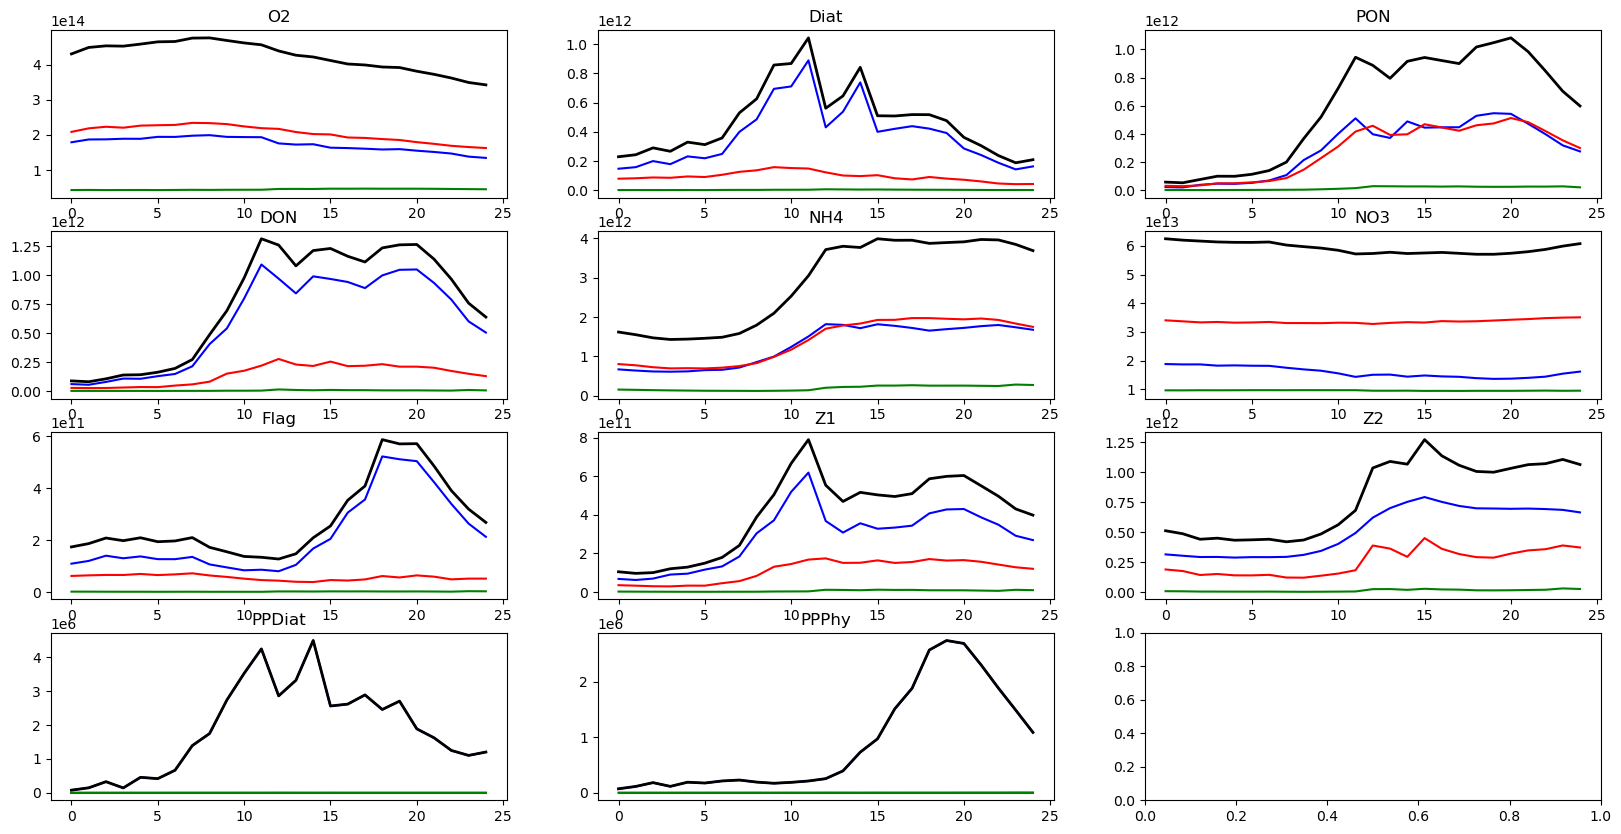

In [ ]:
def plot1_subplots(data_list,data,ncols=2, figsize=(12, 12)):
    colors = ['blue','red','green']
    nplots = len(data_list)
    nrows = int(np.ceil(nplots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)  # flatten in case of multi-row
    depths_n = ['Shallow','Intermediate','Deep','Total']
    for i, variable in enumerate(data_list):
        for j in range(data.shape[2]):
            axes[i].plot(data[i, :, j], label=f"{depths_n[j]}",color=colors[j])
            
        
        # Plot the sum across the 3rd dimension
        axes[i].plot(data[i, :, :].sum(axis=1), label=depths_n[-1], linewidth=2, color="k")        
        axes[i].set_title(variable)
        #axes[i].legend()

        # axes[i].plot(data[i,:])
        # axes[i].set_title(f"{variable}")

variables = ['O2','Diat','PON','DON','NH4','NO3','Flag','Z1','Z2','PPDiat','PPPhy']       
plot1_subplots(variables,Count, ncols=3, figsize=(20, 10))

In [ ]:
#count = np.load('SHEM_jan-jul.npy')
#count2 = np.load('202111_jan-jul.npy')

plotslib = {'chem_T':{'var':['dissolved_oxygen']},
        'biol_T':{'var':['diatoms','particulate_organic_nitrogen','dissolved_organic_nitrogen','ammonium','nitrate','flagellates','microzooplankton','mesozooplankton','heterotrophic_bacteria']}
        }
variables2 = ['O2','Diat','PON','DON','NH4','NO3','Flag','Z1','Z2']


Text(0.5, 1.0, 'Total oxygen comparison')

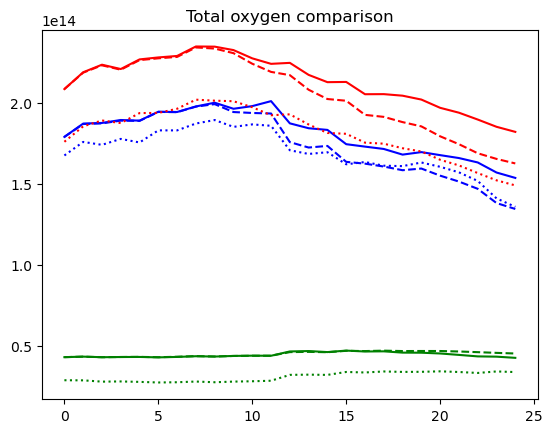

In [ ]:
colors = ['blue','red','green']
for j in range(Count.shape[2]):
    plt.plot(Count[0,:,j],color=colors[j],linestyle='--')
    plt.plot(Countshem[0,:,j],color=colors[j])
    plt.plot(Countoxy[0,:,j],color=colors[j],linestyle=':')
plt.title('Total oxygen comparison')

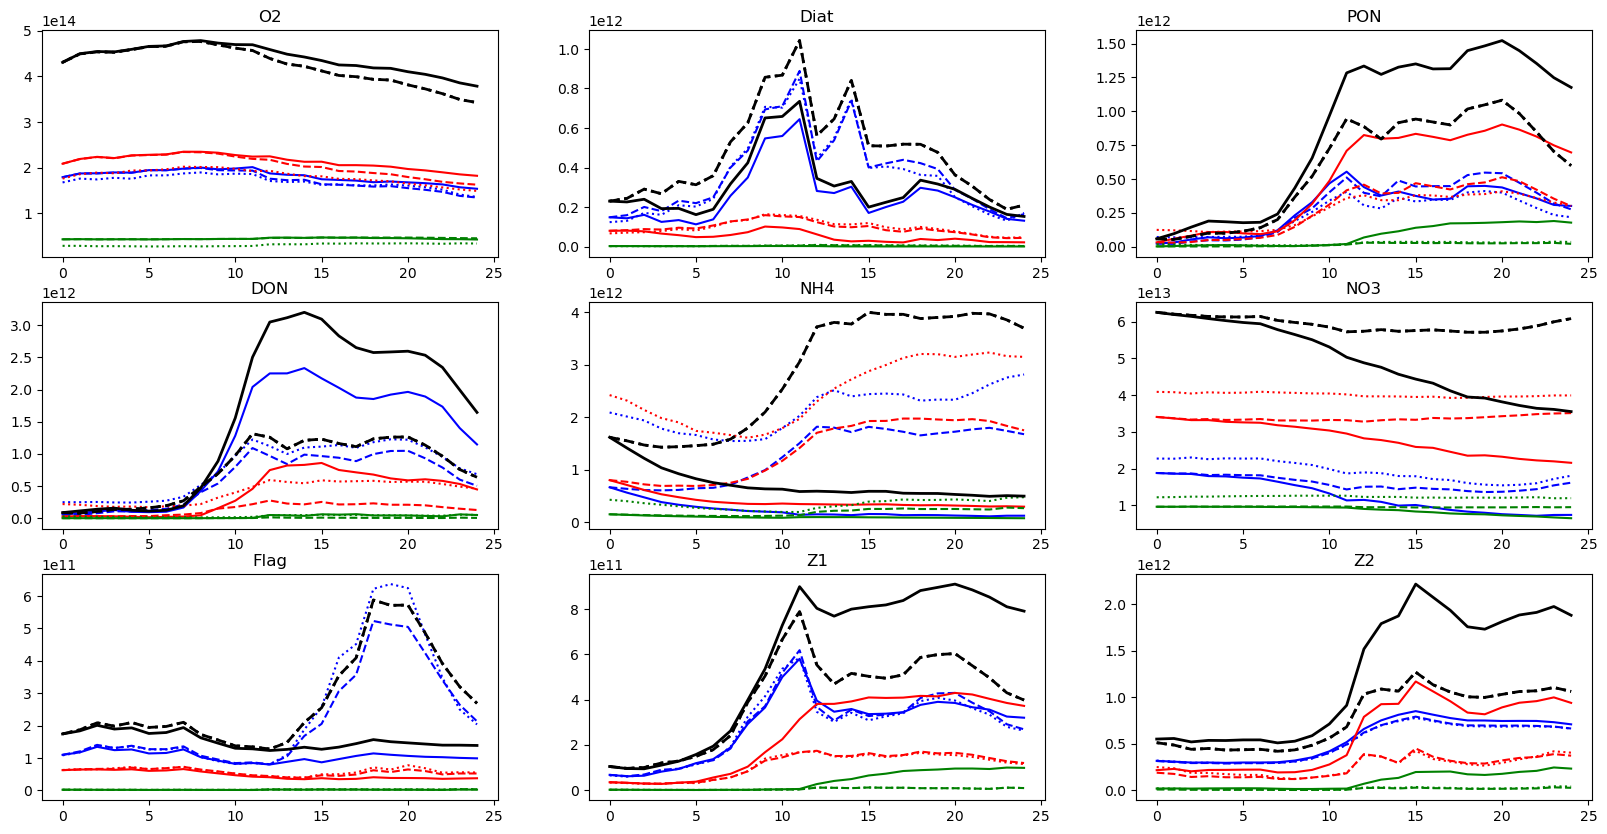

In [ ]:
def plot_subplots(data_list,data, data2,data3,ncols=2, figsize=(12, 12)):
    colors = ['blue','red','green']
    nplots = len(data_list)
    nrows = int(np.ceil(nplots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)  # flatten in case of multi-row
    depths_n = ['Shallow','Intermediate','Deep','Total']
    for i, variable in enumerate(data_list):
        for j in range(data.shape[2]):
            axes[i].plot(data[i, :, j], label=f"{depths_n[j]}",color=colors[j])
            axes[i].plot(data2[i, :, j], label=f"{depths_n[j]}",color=colors[j],linestyle='--')
            axes[i].plot(data3[i, :, j], label=f"{depths_n[j]}",color=colors[j],linestyle=':')

        axes[i].plot(data[i, :, :].sum(axis=1), label=depths_n[-1], linewidth=2, color="k")
        axes[i].plot(data2[i, :, :].sum(axis=1), label=depths_n[-1], linewidth=2, color="k",linestyle='--')
        axes[i].plot(data2[i, :, :].sum(axis=1), label=depths_n[-1], linewidth=2, color="k",linestyle=':')
        

        axes[i].set_title(variable)
        #axes[i].legend()

        # axes[i].plot(data[i,:])
        # axes[i].set_title(f"{variable}")
        
plot_subplots(variables2,Countshem,Count,Countoxy, ncols=3, figsize=(20, 10))


(0.0, 210.0)

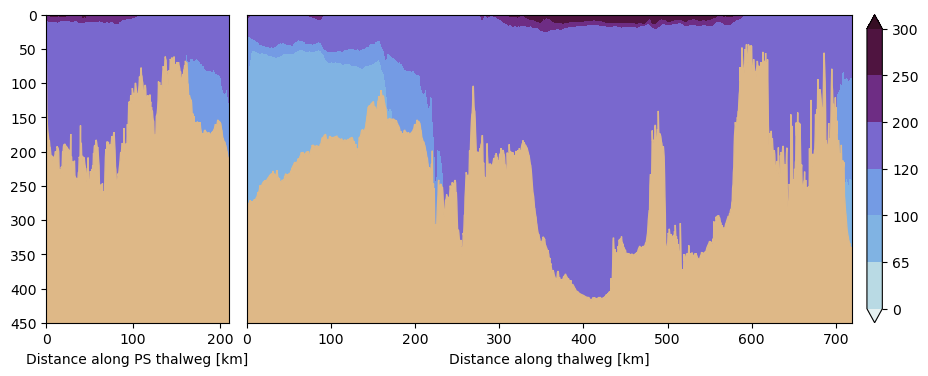

In [ ]:
from salishsea_tools import visualisations as vis
import netCDF4 as nc

fig,ax=plt.subplots(1,2,figsize=(12,4),width_ratios=[0.25, 1])

fmesh = nc.Dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')
fbathy=nc.Dataset('/home/jvalenti/MOAD/grid/bathymetry_201702.nc')
#clevels = np.linspace(0,1,10)
clevels = [0,65,100,120,200,250,300]
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_file2 = '/home/jvalenti/MOAD/analysis-jose/notebooks/Outfall_finalResults/mythalweg6.txt'
var = np.array(Z2[0,:,:,:])
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
thalweg_pts2 = np.loadtxt(thalweg_file2, delimiter=' ', dtype=int)
depth = fmesh.variables['gdept_0'][:]

dep_thal, distance, var_thal = vis.load_thalweg(depth[0, ...], var, fbathy['nav_lon'][:], fbathy['nav_lat'][:],thalweg_pts)
xx_thal = distance
ax[1].set_xlabel('Distance along thalweg [km]')
var_plot = vis._fill_in_bathy(var_thal, fmesh, thalweg_pts)
im = ax[1].contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmocean.cm.dense,extend='both')
#ax[1].contour(xx_thal, dep_thal, var_plot, levels=[0.1,2],colors=['White','grey'],zorder=1)

cbar = plt.colorbar(im, ax=ax[1],pad=0.02)

vis._add_bathy_patch(xx_thal, fbathy['Bathymetry'][:], thalweg_pts, ax[1], color='burlywood')
ax[1].tick_params(left = False, right = False , labelleft = False) 

dep_thal, distance, var_thal = vis.load_thalweg(depth[0, ...], var, fbathy['nav_lon'][:], fbathy['nav_lat'][:],thalweg_pts2)
xx_thal = distance
ax[0].set_xlabel('Distance along PS thalweg [km]')
var_plot = vis._fill_in_bathy(var_thal, fmesh, thalweg_pts2)
im = ax[0].contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmocean.cm.dense,extend='both')
#ax[0].contour(xx_thal, dep_thal, var_plot, levels=[0.1,1],colors=['White','grey'],zorder=1)

vis._add_bathy_patch(xx_thal, fbathy['Bathymetry'][:], thalweg_pts2, ax[0], color='burlywood')

fig.subplots_adjust(wspace=0.04, hspace=0.1)
ax[1].set_ylim([450,0])

#ax[1].scatter(185,445,c='red',marker='^')
#ax[0].scatter(180,445,c='blue',marker='^')
#ax[1].axvline(x=185,c='k')
ax[0].set_ylim([450,0])
#ax[0].axvline(x=180,c='k')
ax[0].set_xlim([0,210])
#fig.savefig('thalweg.pdf')
# levels = [0.1,1]
# for level, color in zip(levels, ['white', 'grey']):
#     cbar.ax.axhline(y=level, color=color, linewidth=2)

In [ ]:
Z22 = xr.open_dataset('/ocean/atall/MOAD/Model/202410b/oxygen/25aug21/SalishSea_1d_20210825_20210825_biol_T.nc').mesozooplankton

NameError: name 'xr' is not defined

(0.0, 210.0)

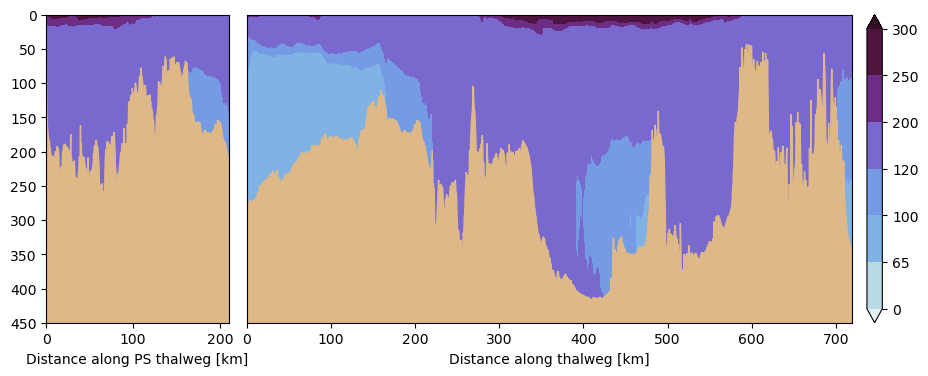

In [ ]:
from salishsea_tools import visualisations as vis
import netCDF4 as nc

fig,ax=plt.subplots(1,2,figsize=(12,4),width_ratios=[0.25, 1])

fmesh = nc.Dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')
fbathy=nc.Dataset('/home/jvalenti/MOAD/grid/bathymetry_201702.nc')
#clevels = np.linspace(0,300,10)
clevels = [0,65,100,120,200,250,300]
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_file2 = '/home/jvalenti/MOAD/analysis-jose/notebooks/Outfall_finalResults/mythalweg6.txt'
var = np.array(Z22[0,:,:,:])#-np.array(Z2[0,:,:,:])
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
thalweg_pts2 = np.loadtxt(thalweg_file2, delimiter=' ', dtype=int)
depth = fmesh.variables['gdept_0'][:]

dep_thal, distance, var_thal = vis.load_thalweg(depth[0, ...], var, fbathy['nav_lon'][:], fbathy['nav_lat'][:],thalweg_pts)
xx_thal = distance
ax[1].set_xlabel('Distance along thalweg [km]')
var_plot = vis._fill_in_bathy(var_thal, fmesh, thalweg_pts)
im = ax[1].contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmocean.cm.dense,extend='both')
#ax[1].contour(xx_thal, dep_thal, var_plot, levels=[0.1,2],colors=['White','grey'],zorder=1)

cbar = plt.colorbar(im, ax=ax[1],pad=0.02)

vis._add_bathy_patch(xx_thal, fbathy['Bathymetry'][:], thalweg_pts, ax[1], color='burlywood')
ax[1].tick_params(left = False, right = False , labelleft = False) 

dep_thal, distance, var_thal = vis.load_thalweg(depth[0, ...], var, fbathy['nav_lon'][:], fbathy['nav_lat'][:],thalweg_pts2)
xx_thal = distance
ax[0].set_xlabel('Distance along PS thalweg [km]')
var_plot = vis._fill_in_bathy(var_thal, fmesh, thalweg_pts2)
im = ax[0].contourf(xx_thal, dep_thal, var_plot, clevels, cmap=cmocean.cm.dense,extend='both')
#ax[0].contour(xx_thal, dep_thal, var_plot, levels=[0.1,1],colors=['White','grey'],zorder=1)

vis._add_bathy_patch(xx_thal, fbathy['Bathymetry'][:], thalweg_pts2, ax[0], color='burlywood')

fig.subplots_adjust(wspace=0.04, hspace=0.1)
ax[1].set_ylim([450,0])

#ax[1].scatter(185,445,c='red',marker='^')
#ax[0].scatter(180,445,c='blue',marker='^')
#ax[1].axvline(x=185,c='k')
ax[0].set_ylim([450,0])
#ax[0].axvline(x=180,c='k')
ax[0].set_xlim([0,210])
#fig.savefig('thalweg.pdf')
# levels = [0.1,1]
# for level, color in zip(levels, ['white', 'grey']):
#     cbar.ax.axhline(y=level, color=color, linewidth=2)